In [1]:
from src.football_db import FootballDB
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
team_list = ['ARZ','ATL','BLT','BUF','CAR','CHI','CIN','CLV','DAL','DEN','DET',
 'GB','HST','IND','JAX','KC','LV','LAC','LA','MIA','MIN','NE','NO',
 'NYG','NYJ','PHI','PIT','SF','SEA','TB','TEN','WAS']

In [3]:
df_pass = FootballDB().get_tPass()
df_rush = FootballDB().get_tRush()

In [4]:
league_pass_df = pd.DataFrame(columns = ['team','avg_yards_gained','avg_yac','first_conv_perc','td_perc','to_perc'])
league_rush_df = pd.DataFrame(columns = ['avg_yards_gained','avg_yac','first_conv_perc','td_perc','fum_perc'])

for team in team_list:
    
    ########### Calculate metrics for radar categories ############
    
    team_pass = df_pass[df_pass.offense == team]
    team_rush = df_rush[df_rush.offense == team]
    
    pass_df = team_pass[['yards_gained','yards_after_catch','first_down_conv','touchdown','turnover_worthy_play']]
    rush_df = team_rush[['yards_gained','yards_after_contact','first_down_conv','touchdown','fumbles']]
    
    league_pass_df = pd.concat([league_pass_df, pd.DataFrame({'team':[team], 
                                                                'avg_yards_gained':[np.mean(pass_df.yards_gained)], 
                                                                'avg_yac':[np.mean(pass_df.yards_after_catch)],
                                                                'first_conv_perc':[len(pass_df[pass_df.first_down_conv == 'Y'])/len(pass_df)],
                                                                'td_perc':[len(pass_df[pass_df.touchdown == 1.0])/len(pass_df)],
                                                                'to_perc':[len(pass_df[pass_df.turnover_worthy_play == 1.0])/len(pass_df)]
                                                               })],ignore_index = True)
    league_rush_df = pd.concat([league_rush_df, pd.DataFrame({'team':[team], 
                                                                'avg_yards_gained':[np.mean(rush_df.yards_gained)], 
                                                                'avg_yac':[np.mean(rush_df.yards_after_contact)],
                                                                'first_conv_perc':[len(rush_df[rush_df.first_down_conv == 'Y'])/len(rush_df)],
                                                                'td_perc':[len(rush_df[rush_df.touchdown == 1.0])/len(rush_df)],
                                                                'fum_perc':[len(rush_df[rush_df.fumbles == 1.0])/len(rush_df)]
                                                               })],ignore_index = True)
    
    
########### Convert to rankings for avg_yards_gained ############
    
league_pass_df = league_pass_df.sort_values('avg_yards_gained', ascending=False).reset_index(drop=True)
league_rush_df = league_rush_df.sort_values('avg_yards_gained', ascending=False).reset_index(drop=True)
    
rank_list = []
for team in league_pass_df['team']:
    rank = league_pass_df.index[league_pass_df['team']==team] + 1
    rank_list.append(rank[0])
league_pass_df['avg_yards_gained'] = rank_list
    
rank_list = []
for team in league_rush_df['team']:
    rank = league_rush_df.index[league_rush_df['team']==team] + 1
    rank_list.append(rank[0])
league_rush_df['avg_yards_gained'] = rank_list


########### Convert to rankings for avg_yac ############
    
league_pass_df = league_pass_df.sort_values('avg_yac', ascending=False).reset_index(drop=True)
league_rush_df = league_rush_df.sort_values('avg_yac', ascending=False).reset_index(drop=True)
    
rank_list = []
for team in league_pass_df['team']:
    rank = league_pass_df.index[league_pass_df['team']==team] + 1
    rank_list.append(rank[0])
league_pass_df['avg_yac'] = rank_list
    
rank_list = []
for team in league_rush_df['team']:
    rank = league_rush_df.index[league_rush_df['team']==team] + 1
    rank_list.append(rank[0])
league_rush_df['avg_yac'] = rank_list

########### Convert to rankings for first_conv_perc ############
    
league_pass_df = league_pass_df.sort_values('first_conv_perc', ascending=False).reset_index(drop=True)
league_rush_df = league_rush_df.sort_values('first_conv_perc', ascending=False).reset_index(drop=True)
    
rank_list = []
for team in league_pass_df['team']:
    rank = league_pass_df.index[league_pass_df['team']==team] + 1
    rank_list.append(rank[0])
league_pass_df['first_conv_perc'] = rank_list
    
rank_list = []
for team in league_rush_df['team']:
    rank = league_rush_df.index[league_rush_df['team']==team] + 1
    rank_list.append(rank[0])
league_rush_df['first_conv_perc'] = rank_list

########### Convert to rankings for td_perc ############
    
league_pass_df = league_pass_df.sort_values('td_perc', ascending=False).reset_index(drop=True)
league_rush_df = league_rush_df.sort_values('td_perc', ascending=False).reset_index(drop=True)
    
rank_list = []
for team in league_pass_df['team']:
    rank = league_pass_df.index[league_pass_df['team']==team] + 1
    rank_list.append(rank[0])
league_pass_df['td_perc'] = rank_list
    
rank_list = []
for team in league_rush_df['team']:
    rank = league_rush_df.index[league_rush_df['team']==team] + 1
    rank_list.append(rank[0])
league_rush_df['td_perc'] = rank_list

########### Convert to rankings for to_perc ############
    
league_pass_df = league_pass_df.sort_values('to_perc').reset_index(drop=True)
league_rush_df = league_rush_df.sort_values('fum_perc').reset_index(drop=True)
    
rank_list = []
for team in league_pass_df['team']:
    rank = league_pass_df.index[league_pass_df['team']==team] + 1
    rank_list.append(rank[0])
league_pass_df['to_perc'] = rank_list
    
rank_list = []
for team in league_rush_df['team']:
    rank = league_rush_df.index[league_rush_df['team']==team] + 1
    rank_list.append(rank[0])
league_rush_df['fum_perc'] = rank_list

In [5]:
league_pass_df

,team,avg_yards_gained,avg_yac,first_conv_perc,td_perc,to_perc
0,LV,8,10,25,23,1
1,NE,9,7,13,12,2
2,CAR,10,11,2,24,3
3,NYJ,15,14,24,32,4
4,MIN,25,18,27,22,5
5,CIN,12,8,19,10,6
6,SF,1,2,4,14,7
7,CLV,11,15,14,29,8
8,ATL,22,26,5,19,9
9,GB,5,3,11,2,10


In [108]:
def build_pass_radar_plot(team1, team2):
    
    fig = go.Figure()

    categories_pass = ['Avg. Yards per Play','Avg. Yards After Catch','First Down Conv. %',
                       'TD %','Turnover %','Avg. Yards per Play']

    fig.add_trace(
        go.Scatterpolar(
            theta=categories_pass,
            r=[league_pass_df[league_pass_df.team == team1].avg_yards_gained.values[0],
               league_pass_df[league_pass_df.team == team1].avg_yac.values[0],
               league_pass_df[league_pass_df.team == team1].first_conv_perc.values[0],
               league_pass_df[league_pass_df.team == team1].td_perc.values[0],
               league_pass_df[league_pass_df.team == team1].to_perc.values[0],
               league_pass_df[league_pass_df.team == team1].avg_yards_gained.values[0]
              ],
            fill='toself',
            name=team1,
            hovertemplate =
            '<br><b>Variable</b>: %{theta}'+
            '<br><b>League Rank</b>: %{r}'
        )
    )
    fig.add_trace(
        go.Scatterpolar(
            theta=categories_pass,
            r=[league_pass_df[league_pass_df.team == team2].avg_yards_gained.values[0],
               league_pass_df[league_pass_df.team == team2].avg_yac.values[0],
               league_pass_df[league_pass_df.team == team2].first_conv_perc.values[0],
               league_pass_df[league_pass_df.team == team2].td_perc.values[0],
               league_pass_df[league_pass_df.team == team2].to_perc.values[0],
               league_pass_df[league_pass_df.team == team2].avg_yards_gained.values[0]
              ],
            fill='toself',
            name=team2,
            hovertemplate =
            '<br><b>Variable</b>: %{theta}'+
            '<br><b>League Rank</b>: %{r}'
        )
    )
    fig.update_layout(
        title={
            'text': "Passing Radar",
            'y':0.9,
            'x':0.49,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        width=600,
        height=500,
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[32, 1]
            )
        )
    )
    fig.show()
    return

In [109]:
def build_rush_radar_plot(team1, team2):
    
    fig = go.Figure()

    categories_rush = ['Avg. Yards per Play','Avg. Yards After Catch','First Down Conv. %',
                       'TD %','Fumble %','Avg. Yards per Play']

    fig.add_trace(
        go.Scatterpolar(
            theta=categories_rush,
            r=[league_rush_df[league_rush_df.team == team1].avg_yards_gained.values[0],
               league_rush_df[league_rush_df.team == team1].avg_yac.values[0],
               league_rush_df[league_rush_df.team == team1].first_conv_perc.values[0],
               league_rush_df[league_rush_df.team == team1].td_perc.values[0],
               league_rush_df[league_rush_df.team == team1].fum_perc.values[0],
               league_rush_df[league_rush_df.team == team1].avg_yards_gained.values[0]
              ],
            fill='toself',
            name=team1,
            hovertemplate =
            '<br><b>Variable</b>: %{theta}'+
            '<br><b>League Rank</b>: %{r}'
        )
    )
    fig.add_trace(
        go.Scatterpolar(
            theta=categories_rush,
            r=[league_rush_df[league_rush_df.team == team2].avg_yards_gained.values[0],
               league_rush_df[league_rush_df.team == team2].avg_yac.values[0],
               league_rush_df[league_rush_df.team == team2].first_conv_perc.values[0],
               league_rush_df[league_rush_df.team == team2].td_perc.values[0],
               league_rush_df[league_rush_df.team == team2].fum_perc.values[0],
               league_rush_df[league_rush_df.team == team2].avg_yards_gained.values[0]
              ],
            fill='toself',
            name=team2,
            hovertemplate =
            '<br><b>Variable</b>: %{theta}'+
            '<br><b>League Rank</b>: %{r}'
        )
    )
    fig.update_layout(
        title={
            'text': "Rushing Radar",
            'y':0.9,
            'x':0.49,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        width=600,
        height=500,
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[32, 1]
            )
        )
    )
    fig.show()
    return

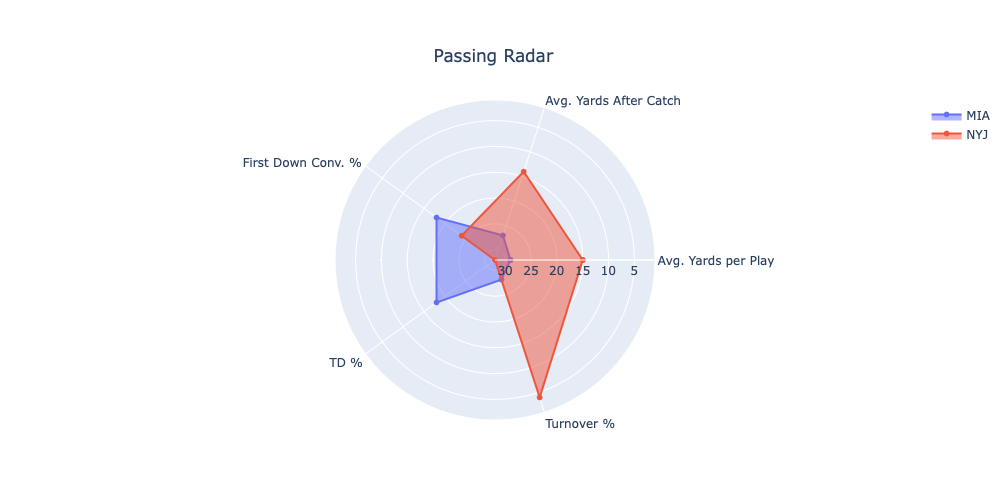

In [110]:
build_pass_radar_plot('MIA','NYJ')

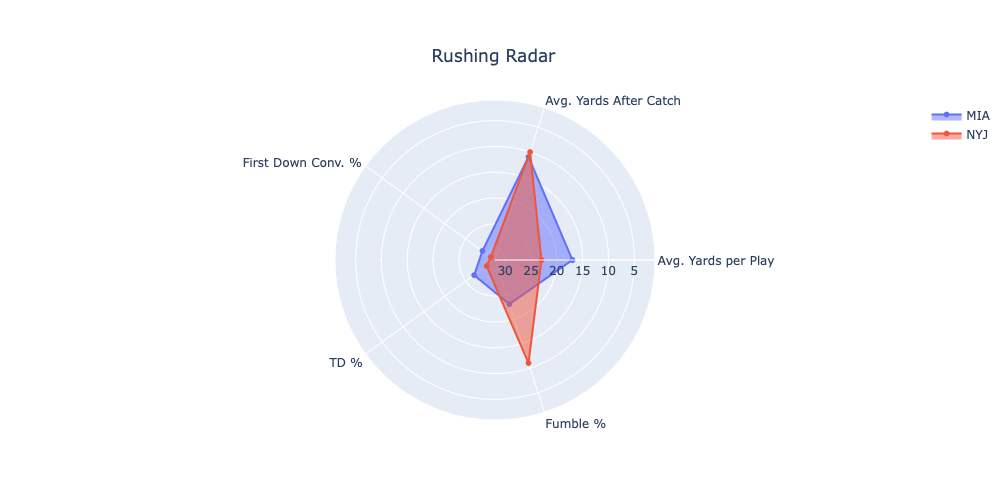

In [107]:
build_rush_radar_plot('MIA','NYJ')